In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import mitsuba as mi
import drjit as dr
import numpy as np
from matplotlib import pyplot as plt

print(mi.variants())
mi.set_variant("cuda_ad_spectral_polarized")

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


In [10]:
integrator = mi.load_dict({
    "type": "stokes",
    "nested": {
        "type": "path"
    }
})

In [58]:
scene = mi.load_file("../scenes/polarized_face_env_map.xml")
image = mi.render(scene, integrator=integrator)
bitmap = mi.Bitmap(image, channel_names=['R', 'G', 'B'] + integrator.aov_names())
channels = dict(bitmap.split())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.036437888..1.4769076].


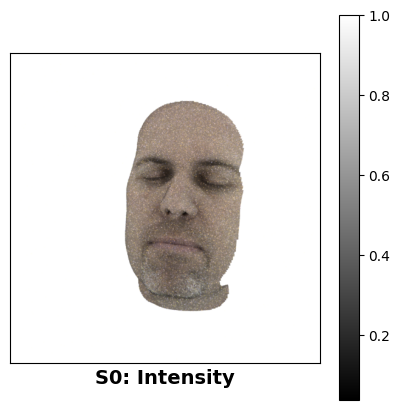

In [59]:
plt.figure(figsize=(5, 5))
plt.imshow(channels['S0'].convert(srgb_gamma=True), cmap='gray')
plt.colorbar()
plt.xticks([]); plt.yticks([])
plt.xlabel("S0: Intensity", size=14, weight='bold')
plt.show()

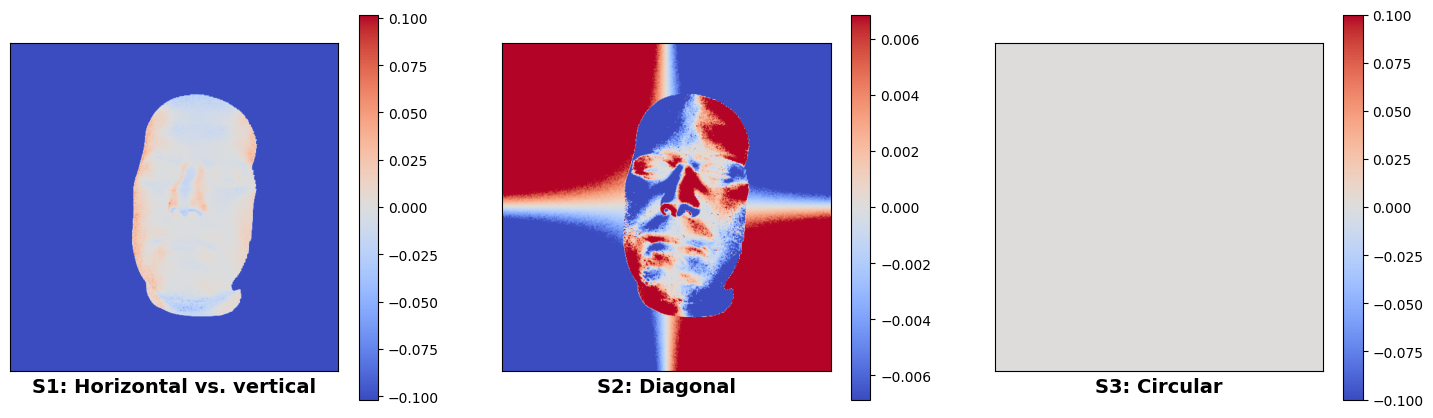

In [60]:
def plot_stokes_component(ax, image):
    # Convert the image into a TensorXf for manipulation
    data = mi.TensorXf(image)[:, :, 0]
    plot_minmax = 0.05 * max(dr.max(data, axis=None), dr.max(-data, axis=None)).array[0] # Arbitrary scale for colormap
    img = ax.imshow(data, cmap='coolwarm', vmin=-plot_minmax, vmax=+plot_minmax)
    ax.set_xticks([]); ax.set_yticks([])
    return img


fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
img = plot_stokes_component(ax[0], channels['S1'])
plt.colorbar(img, ax=ax[0])
img = plot_stokes_component(ax[1], channels['S2'])
plt.colorbar(img, ax=ax[1])
img = plot_stokes_component(ax[2], channels['S3'])
plt.colorbar(img, ax=ax[2])

ax[0].set_xlabel("S1: Horizontal vs. vertical", size=14, weight='bold')
ax[1].set_xlabel("S2: Diagonal", size=14, weight='bold')
ax[2].set_xlabel("S3: Circular", size=14, weight='bold')

plt.show()

In [17]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  -------------------------------------------------------------------------------------------------
  Name                                          Flags    Type              Parent
  -------------------------------------------------------------------------------------------------
  sensor.near_clip                                       float             PerspectiveCamera
  sensor.far_clip                                        float             PerspectiveCamera
  sensor.shutter_open                                    float             PerspectiveCamera
  sensor.shutter_open_time                               float             PerspectiveCamera
  sensor.film.size                                       ScalarVector2u    HDRFilm
  sensor.film.crop_size                                  ScalarVector2u    HDRFilm
  sensor.film.crop_offset                                ScalarPoint2u     HDRFilm
  sensor.x_fov                                  ∂, D     Float             Persp